In [1]:
import random

# PARAMETERS
REFERENCE = "ATGGAGACCACCGTGAACCGGACCTTGAGGCATACTTCAAA"
DNA_BASES = ['A', 'T', 'G', 'C']
POPULATION_SIZE = 100
GENERATIONS = 1000
MUTATION_RATE = 0.01

# Function to generate a random DNA sequence
def generate_random_dna(length):
    return ''.join(random.choice(DNA_BASES) for _ in range(length))

# Fitness function: number of matching characters
def fitness(individual):
    return sum(1 for a, b in zip(individual, REFERENCE) if a == b)

# Crossover two parents
def crossover(parent1, parent2):
    point = random.randint(1, len(parent1) - 2)
    return parent1[:point] + parent2[point:]

# Mutate a DNA sequence
def mutate(sequence):
    return ''.join(
        base if random.random() > MUTATION_RATE else random.choice(DNA_BASES)
        for base in sequence
    )

# Generate initial population
population = [generate_random_dna(len(REFERENCE)) for _ in range(POPULATION_SIZE)]

# Run the genetic algorithm
for generation in range(GENERATIONS):
    population = sorted(population, key=fitness, reverse=True)
    best = population[0]
    print(f"Generation {generation}: Best Fitness = {fitness(best)} | Sequence: {best}")

    if best == REFERENCE:
        print("Perfect match found!")
        break

    # Selection: take top 20%
    selected = population[:POPULATION_SIZE // 5]

    # Reproduce and mutate to create new population
    next_generation = []
    while len(next_generation) < POPULATION_SIZE:
        parent1, parent2 = random.sample(selected, 2)
        child = crossover(parent1, parent2)
        child = mutate(child)
        next_generation.append(child)

    population = next_generation
##the mutation can be positive or negative 

Generation 0: Best Fitness = 19 | Sequence: TAAGCTGGCACTGGGGCCGGGATCTTGGGGTCTCCATAGTG
Generation 1: Best Fitness = 20 | Sequence: TACGCTGGCACTGGGGCCGGGATCTTGGGGCCTCCATAGTG
Generation 2: Best Fitness = 25 | Sequence: CTCAAGACACCCGAGCATCGAAAATTGACGTTTGCTACAAA
Generation 3: Best Fitness = 27 | Sequence: CTCAAGACACCCGAGCATCGGATCTTGGGGCGCGCTACAAA
Generation 4: Best Fitness = 27 | Sequence: CTCAAGACACCCGAGCATCGGATCTTGGGTCGCACTACAAA
Generation 5: Best Fitness = 28 | Sequence: GTCAAGACACCCGAGCATCGGATCTTGGGGCTTGCTACAAA
Generation 6: Best Fitness = 28 | Sequence: CTTCAGACACCCGAGCATCGGATCTTGGGGCTTGCTACAAA
Generation 7: Best Fitness = 29 | Sequence: ATCAAGACACCCGAGTATCGGATCTTGGGGCGCACTACAAA
Generation 8: Best Fitness = 31 | Sequence: ATCAAGACACCCGAGCACCGGATCTTGGGGCACACTACAAA
Generation 9: Best Fitness = 31 | Sequence: ATCAAGACACCCGAGCACCGGATCTTGGGGCACACTACAAA
Generation 10: Best Fitness = 32 | Sequence: CTGCAGACCCCCGAGCACCGGATCTTGGGGCACACTACAAA
Generation 11: Best Fitness = 32 | Sequence: CTGCAGAC

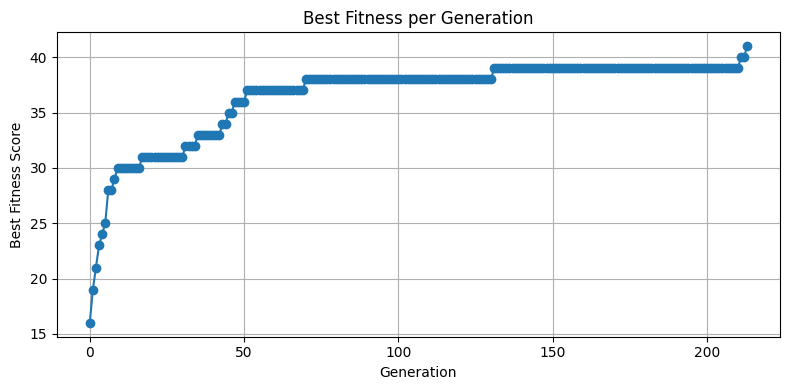

In [8]:
import matplotlib.pyplot as plt

# Track best fitness per generation
best_fitness_per_generation = []

# Re-run the genetic algorithm to collect fitness data
population = [generate_random_dna(len(REFERENCE)) for _ in range(POPULATION_SIZE)]
for generation in range(GENERATIONS):
    population = sorted(population, key=fitness, reverse=True)
    best = population[0]
    best_fit = fitness(best)
    best_fitness_per_generation.append(best_fit)
    if best_fit == len(REFERENCE):
        break
    selected = population[:POPULATION_SIZE // 5]
    next_generation = []
    while len(next_generation) < POPULATION_SIZE:
        parent1, parent2 = random.sample(selected, 2)
        child = crossover(parent1, parent2)
        child = mutate(child)
        next_generation.append(child)
    population = next_generation

# Plot the best fitness per generation
plt.figure(figsize=(8, 4))
plt.plot(best_fitness_per_generation, marker='o')
plt.title("Best Fitness per Generation")
plt.xlabel("Generation")
plt.ylabel("Best Fitness Score")
plt.grid(True)
plt.tight_layout()
plt.show()

In [11]:
import random

# Load the full HBV genome (3,215 bp)
HBV_GENOME = (
    
    """AATTCCACAACCTTCCACCAAACTCTGCAAGATCCCAGAGTGAGAGGCCTGTATTTCCCTGCTGGTGGCT
CCAGTTCAGGAACAGTAAACCCTGTTCTGACTACTGCCTCTCCCTTATCGTCAATCTTCTCGAGGATTGG
GGACCCTGCGCTGAACATGGAGAACATCACATCAGGATTCCTAGGACCCCTTCTCGTGTTACAGGCGGGG
TTTTTCTTGTTGACAAGAATCCTCACAATACCGCAGAGTCTAGACTCGTGGTGGACTTCTCTCAATTTTC
TAGGGGGAACTACCGTGTGTCTTGGCCAAAATTCGCAGTCCCCAACCTCCAATCACTCACCAACCTCTTG
TCCTCCAACTTGTCCTGGTTATCGCTGGATGTGTCTGCGGCGTTTTATCATCTTCCTCTTCATCCTGCTG
CTATGCCTCATCTTCTTGTTGGTTCTTCTGGACTATCAAGGTATGTTGCCCGTTTGTCCTCTAATTCCAG
GATCCTCAACAACCAGCACGGGACCATGCCGGACCTGCATGACTACTGCTCAAGGAACCTCTATGTATCC
CTCCTGTTGCTGTACCAAACCTTCGGACGGAAATTGCACCTGTATTCCCATCCCATCATCCTGGGCTTTC
GGAAAATTCCTATGGGAGTGGGCCTCAGCCCGTTTCTCCTGGCTCAGTTTACTAGTGCCATTTGTTCAGT
GGTTCGTAGGGCTTTCCCCCACTGTTTGGCTTTCAGTTATATGGATGATGTGGTATTGGGGGCCAAGTCT
GTACAGCATCTTGAGTCCCTTTTTACCGCTGTTACCAATTTTCTTTTGTCTTTGGGTATACATTTAAACC
CTAACAAAACAAAGAGATGGGGTTACTCTCTAAATTTTATGGGTTATGTCATTGGATGTTATGGGTCCTT
GCCACAAGAACACATCATACAAAAAATCAAAGAATGTTTTAGAAAACTTCCTATTAACAGGCCTATTGAT
TGGAAAGTATGTCAACGAATTGTGGGTCTTTTGGGTTTTGCTGCCCCTTTTACACAATGTGGTTATCCTG
CGTTGATGCCTTTGTATGCATGTATTCAATCTAAGCAGGCTTTCACTTTCTCGCCAACTTACAAGGCCTT
TCTGTGTAAACAATACCTGAACCTTTACCCCGTTGCCCGGCAACGGCCAGGTCTGTGCCAAGTGTTTGCT
GACGCAACCCCCACTGGCTGGGGCTTGGTCATGGGCCATCAGCGCATGCGTGGAACCTTTTCGGCTCCTC
TGCCGATCCATACTGCGGAACTCCTAGCCGCTTGTTTTGCTCGCAGCAGGTCTGGAGCAAACATTATCGG
GACTGATAACTCTGTTGTCCTATCCCGCAAATATACATCGTTTCCATGGCTGCTAGGCTGTGCTGCCAAC
TGGATCCTGCGCGGGACGTCCTTTGTTTACGTCCCGTCGGCGCTGAATCCTGCGGACGACCCTTCTCGGG
GTCGCTTGGGACTCTCTCGTCCCCTTCTCCGTCTGCCGTTCCGACCGACCACGGGGCGCACCTCTCTTTA
CGCGGACTCCCCGTCTGTGCCTTCTCATCTGCCGGACCGTGTGCACTTCGCTTCACCTCTGCACGTCGCA
TGGAGACCACCGTGAACGCCCACCAAATATTGCCCAAGGTCTTACATAAGAGGACTCTTGGACTCTCAGC
AATGTCAACGACCGACCTTGAGGCATACTTCAAAGACTGTTTGTTTAAAGACTGGGAGGAGTTGGGGGAG
GAGATTAGGTTAAAGGTCTTTGTACTAGGAGGCTGTAGGCATAAATTGGTCTGCGCACCAGCACCATGCA
ACTTTTTCACCTCTGCCTAATCATCTCTTGTTCATGTCCTACTGTTCAAGCCTCCAAGCTGTGCCTTGGG
TGGCTTTGGGGCATGGACATCGACCCTTATAAAGAATTTGGAGCTACTGTGGAGTTACTCTCGTTTTTGC
CTTCTGACTTCTTTCCTTCAGTACGAGATCTTCTAGATACCGCCTCAGCTCTGTATCGGGAAGCCTTAGA
GTCTCCTGAGCATTGTTCACCTCACCATACTGCACTCAGGCAAGCAATTCTTTGCTGGGGGGAACTAATG
ACTCTAGCTACCTGGGTGGGTGTTAATTTGGAAGATCCAGCGTCTAGAGACCTAGTAGTCAGTTATGTCA
ACACTAATATGGGCCTAAAGTTCAGGCAACTCTTGTGGTTTCACATTTCTTGTCTCACTTTTGGAAGAGA
AACAGTTATAGAGTATTTGGTGTCTTTCGGAGTGTGGATTCGCACTCCTCCAGCTTATAGACCACCAAAT
GCCCCTATCCTATCAACACTTCCGGAGACTACTGTTGTTAGACGACGAGGCAGGTCCCCTAGAAGAAGAA
CTCCCTCGCCTCGCAGACGAAGGTCTCAATCGCCGCGTCGCAGAAGATCTCAATCTCGGGAATCTCAATG
TTAGTATTCCTTGGACTCATAAGGTGGGGAACTTTACTGGGCTTTATTCTTCTACTGTACCTGTCTTTAA
TCCTCATTGGAAAACACCATCTTTTCCTAATATACATTTACACCAAGACATTATCAAAAAATGTGAACAG
TTTGTAGGCCCACTCACAGTTAATGAGAAAAGAAGATTGCAATTGATTATGCCTGCCAGGTTTTATCCAA
AGGTTACCAAATATTTACCATTGGATAAGGGTATTAAACCTTATTATCCAGAACATCTAGTTAATCATTA
CTTCCAAACTAGACACTATTTACACACTCTATGGAAGGCGGGTATATTATATAAGAGAGAAACAACACAT
AGCGCCTCATTTTGTGGGTCACCATATTCTTGGGAACAAGATCTACAGCATGGGGCAGAATCTTTCCACC
AGCAATCCTCTGGGATTCTTTCCCGACCACCAGTTGGATCCAGCCTTCAGAGCAAACACCGCAAATCCAG
ATTGGGACTTCAATCCCAACAAGGACACCTGGCCAGACGCCAACAAGGTAGGAGCTGGAGCATTCGGGCT
GGGTTTCACCCCACCGCACGGAGGCCTTTTGGGGTGGAGCCCTCAGGCTCAGGGCATACTACAAACTTTG
CCAGCAAATCCGCCTCCTGCCTCCACCAATCGCCAGTCAGGAAGGCAGCCTACCCCGCTGTCTCCACCTT
TGAGAAACACTCATCCTCAGGCCATGCAGTGG

"""
    # Truncated here for readability – paste the full 3,215 bp sequence as a string
)

DNA_BASES = ['A', 'T', 'G', 'C']
POPULATION_SIZE = 50  # Reduce if running on a limited machine
GENERATIONS = 500     # Increase if needed
MUTATION_RATE = 0.001  # Lower rate to maintain stability

best_fitness_per_generation = []  # Track best fitness per generation
# Function to generate random DNA sequence
def generate_random_dna(length):
    return ''.join(random.choice(DNA_BASES) for _ in range(length))

# Fitness: count matching base pairs
def fitness(individual):
    return sum(1 for a, b in zip(individual, HBV_GENOME) if a == b)

# Crossover function
def crossover(parent1, parent2):
    point = random.randint(1, len(parent1) - 2)
    return parent1[:point] + parent2[point:]

# Mutation function
def mutate(sequence):
    return ''.join(
        base if random.random() > MUTATION_RATE else random.choice(DNA_BASES)
        for base in sequence
    )

# Initial population
population = [generate_random_dna(len(HBV_GENOME)) for _ in range(POPULATION_SIZE)]

# Run GA
for generation in range(GENERATIONS):
    population = sorted(population, key=fitness, reverse=True)
    best = population[0]
    best_fit = fitness(best)
    best_fitness_per_generation.append(best_fit)  # Track best fitness
    print(f"Generation {generation} | Best Match: {best_fit}/{len(HBV_GENOME)}")

    if best_fit == len(HBV_GENOME):
        print("Perfect genome match found!")
        break

    # Select top 20%
    selected = population[:POPULATION_SIZE // 5]

    # Reproduce and mutate
    next_generation = []
    while len(next_generation) < POPULATION_SIZE:
        parent1, parent2 = random.sample(selected, 2)
        child = crossover(parent1, parent2)
        child = mutate(child)
        next_generation.append(child)

    population = next_generation


Generation 0 | Best Match: 864/3229
Generation 1 | Best Match: 865/3229
Generation 2 | Best Match: 882/3229
Generation 3 | Best Match: 888/3229
Generation 4 | Best Match: 898/3229
Generation 5 | Best Match: 907/3229
Generation 6 | Best Match: 913/3229
Generation 7 | Best Match: 918/3229
Generation 8 | Best Match: 924/3229
Generation 9 | Best Match: 929/3229
Generation 10 | Best Match: 933/3229
Generation 11 | Best Match: 936/3229
Generation 12 | Best Match: 941/3229
Generation 13 | Best Match: 943/3229
Generation 14 | Best Match: 944/3229
Generation 15 | Best Match: 946/3229
Generation 16 | Best Match: 948/3229
Generation 17 | Best Match: 951/3229
Generation 18 | Best Match: 953/3229
Generation 19 | Best Match: 953/3229
Generation 20 | Best Match: 958/3229
Generation 21 | Best Match: 962/3229
Generation 22 | Best Match: 966/3229
Generation 23 | Best Match: 968/3229
Generation 24 | Best Match: 973/3229
Generation 25 | Best Match: 973/3229
Generation 26 | Best Match: 976/3229
Generation 

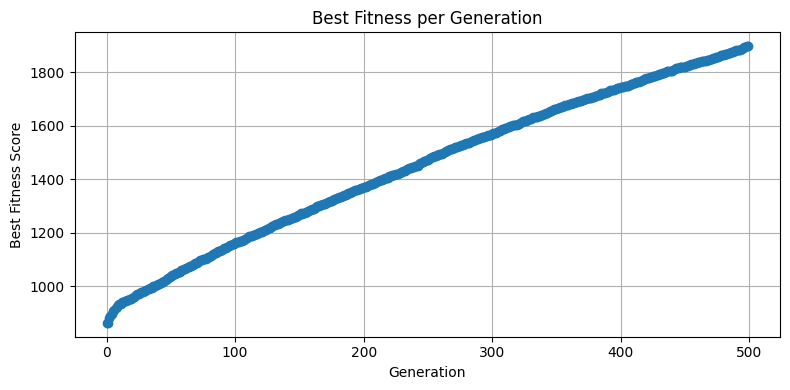

In [12]:
import matplotlib.pyplot as plt

# Example: If you have a list called best_fitness_per_generation
# Replace this with your actual list if named differently
# best_fitness_per_generation = [...]

plt.figure(figsize=(8, 4))
plt.plot(best_fitness_per_generation, marker='o')
plt.title("Best Fitness per Generation")
plt.xlabel("Generation")
plt.ylabel("Best Fitness Score")
plt.grid(True)
plt.tight_layout()
plt.show()

In [13]:
from Bio import SeqIO
from Bio.Seq import Seq

# Load the GenBank file
record = SeqIO.read("sequence.gb", "genbank")

print(f"Genome length: {len(record.seq)} bp")

# Extract protein-coding genes
for feature in record.features:
    if feature.type == "CDS":
        gene = feature.qualifiers.get("gene", ["unknown"])[0]
        product = feature.qualifiers.get("product", ["unknown protein"])[0]
        translation = feature.qualifiers.get("translation", [""])[0]

        print(f"\nGene: {gene}")
        print(f"Product: {product}")
        print(f"Protein sequence (first 60 aa): {translation[:60]}...")


Genome length: 3182 bp

Gene: P
Product: polymerase
Protein sequence (first 60 aa): MPLSYQHFRRLLLLDDEAGPLEEELPRLADEGLNRRVAEDLNLGNLNVSIPWTHKVGNFT...

Gene: S
Product: large envelope protein
Protein sequence (first 60 aa): MGQNLSTSNPLGFFPDHQLDPAFRANTANPDWDFNPNKDTWPDANKVGAGAFGLGFTPPH...

Gene: S
Product: middle envelope protein
Protein sequence (first 60 aa): MQWNSTTFHQTLQDPRVRGLYFPAGGSSSGTVNPVLTTASPLSSIFSRIGDPALNMENIT...

Gene: S
Product: small envelope protein
Protein sequence (first 60 aa): MENITSGFLGPLLVLQAGFFLLTRILTIPQSLDSWWTSLNFLGGTTVCLGQNSQSPTSNH...

Gene: X
Product: X protein
Protein sequence (first 60 aa): MAARLCCQLDPARDVLCLRPVGAESCGRPFSGSLGTLSSPSPSAVPTDHGAHLSLRGLPV...

Gene: C
Product: pre-capsid protein
Protein sequence (first 60 aa): MQLFHLCLIISCSCPTVQASKLCLGWLWGMDIDPYKEFGATVELLSFLPSDFFPSVRDLL...

Gene: C
Product: capsid protein
Protein sequence (first 60 aa): MDIDPYKEFGATVELLSFLPSDFFPSVRDLLDTASALYREALESPEHCSPHHTALRQAIL...
